In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
training = pd.read_csv('~/Desktop/titanic/train.csv')
test = pd.read_csv('~/Desktop/titanic/test.csv')

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
training.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df_num=training[['Age','SibSp','Fare','Parch']]
df_cat=training[['Sex','Pclass','Survived','Cabin','Embarked','Ticket']]

C:\Users\Asus\.conda\envs\projects\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Asus\.conda\envs\projects\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


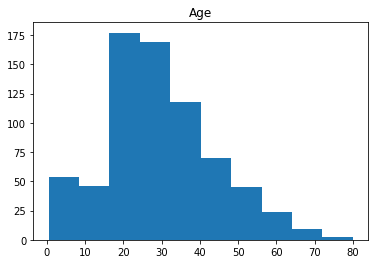

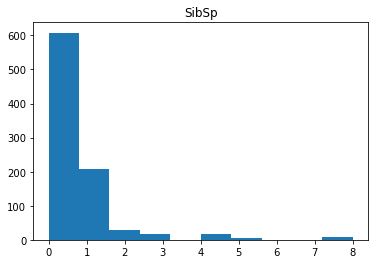

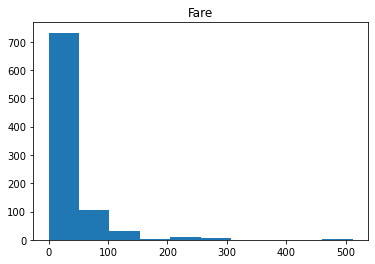

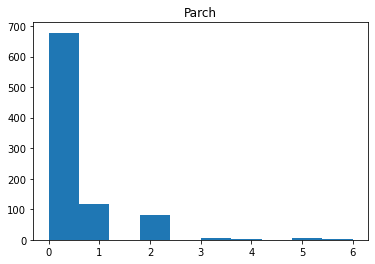

In [11]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp      Fare     Parch
Age    1.000000 -0.308247  0.096067 -0.189119
SibSp -0.308247  1.000000  0.159651  0.414838
Fare   0.096067  0.159651  1.000000  0.216225
Parch -0.189119  0.414838  0.216225  1.000000


<AxesSubplot:>

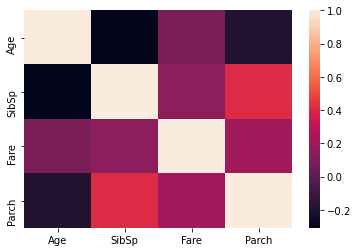

In [12]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [13]:
pd.pivot_table(training,index='Survived',values= [i for i in df_num])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


C:\Users\Asus\.conda\envs\projects\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


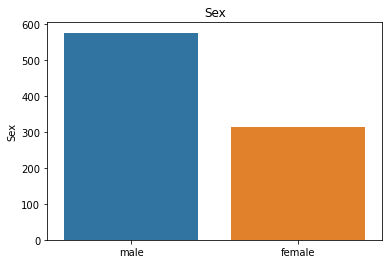

C:\Users\Asus\.conda\envs\projects\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


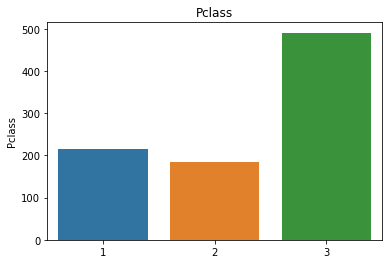

C:\Users\Asus\.conda\envs\projects\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


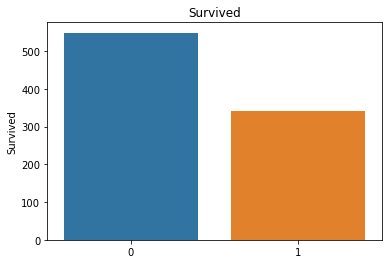

C:\Users\Asus\.conda\envs\projects\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


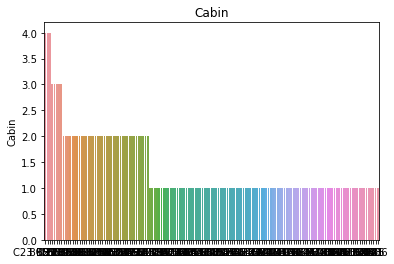

C:\Users\Asus\.conda\envs\projects\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


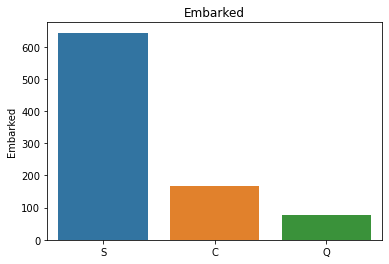

C:\Users\Asus\.conda\envs\projects\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


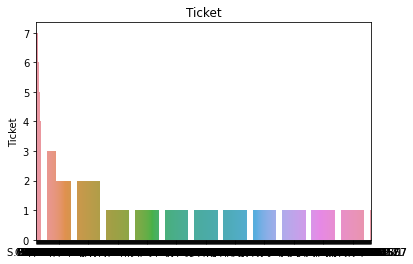

In [14]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [15]:
print(pd.pivot_table(training,index='Survived',values= 'Ticket',aggfunc='count',columns='Pclass'))
print()
print(pd.pivot_table(training,index='Survived',values= 'Ticket',aggfunc='count',columns='Embarked'))
print()
print(pd.pivot_table(training,index='Survived',values= 'Ticket',aggfunc='count',columns='Sex'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

Sex       female  male
Survived              
0             81   468
1            233   109


In [16]:
training.Cabin.head(50)

0             NaN
1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
28            NaN
29            NaN
30            NaN
31            B78
32            NaN
33            NaN
34            NaN
35            NaN
36            NaN
37            NaN
38            NaN
39            NaN
40            NaN
41            NaN
42            NaN
43            NaN
44            NaN
45            NaN
46            NaN
47            NaN
48            NaN
49            NaN
Name: Cabin, dtype: object

In [17]:
df_cat.Cabin
training['cabin_mul']=training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_mul'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_mul, dtype: int64

In [18]:
print(pd.pivot_table(training,index='Survived',values= 'Ticket',aggfunc='count',columns='cabin_mul'))

cabin_mul      0      1    2    3    4
Survived                              
0          481.0   58.0  7.0  3.0  NaN
1          206.0  122.0  9.0  3.0  2.0


In [19]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
print(training.cabin_adv.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


In [20]:
pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [21]:
training.Ticket.head(15)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [22]:
training['numeric_ticket']=training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['alpha_ticket']=training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0) 

In [23]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [24]:
pd.set_option('max_rows',None)
training['alpha_ticket'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
wep            3
pp             3
sotono2        2
swpp           2
scah           2
ppp            2
fc             1
scow           1
fa             1
as             1
sop            1
sc             1
scahbasle      1
casoton        1
sp             1
sca4           1
Name: alpha_ticket, dtype: int64

In [25]:
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [26]:
pd.pivot_table(training,index='Survived',columns='alpha_ticket',aggfunc='count',values='Ticket')

alpha_ticket,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [27]:
training.Name.head(15)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
Name: Name, dtype: object

In [28]:
training['name_title']=training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [29]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
Mme               1
Jonkheer          1
Sir               1
Don               1
the Countess      1
Capt              1
Lady              1
Name: name_title, dtype: int64

In [30]:

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])
%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_mul',
       'cabin_adv', 'numeric_ticket', 'alpha_ticket', 'name_title',
       'train_test'],
      dtype='object')

In [31]:
all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_mul,numeric_ticket,train_test
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000,891.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.267116,0.741863,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.547134,0.437855,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000,1.000000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,4.000000,1.000000,1.000000


In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Name            1309 non-null   object 
 4   Sex             1309 non-null   object 
 5   Age             1046 non-null   float64
 6   SibSp           1309 non-null   int64  
 7   Parch           1309 non-null   int64  
 8   Ticket          1309 non-null   object 
 9   Fare            1308 non-null   float64
 10  Cabin           295 non-null    object 
 11  Embarked        1307 non-null   object 
 12  cabin_mul       891 non-null    float64
 13  cabin_adv       891 non-null    object 
 14  numeric_ticket  891 non-null    float64
 15  alpha_ticket    891 non-null    object 
 16  name_title      891 non-null    object 
 17  train_test      1309 non-null   in

In [33]:
all_data['cabin_mul']=all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['name_title']= all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data.Age=all_data.Age.fillna(training.Age.median())
all_data.Fare=all_data.Fare.fillna(training.Fare.median())
all_data.dropna(subset=['Embarked'],inplace=True)
all_data['norm_fare']=np.log(all_data.Fare+1)
all_data.Pclass=all_data.Pclass.astype(str)
all_data['Age']=all_data['Age'].apply(np.int64)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare',
                                       'Embarked','cabin_adv','cabin_mul',
                                       'name_title','train_test']])
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)
y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

In [34]:
X_train.head()

,Age,SibSp,Parch,norm_fare,cabin_mul,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22,1,0,2.110213,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,38,1,0,4.280593,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,26,0,0,2.188856,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,35,1,0,3.990834,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,35,0,0,2.202765,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [35]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

,Age,SibSp,Parch,norm_fare,cabin_mul,train_test,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.578280,0.480272,-0.445407,-0.896331,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.663172,0.480272,-0.445407,1.347870,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.267917,-0.479537,-0.445407,-0.815013,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0.430400,0.480272,-0.445407,1.048255,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.430400,-0.479537,-0.445407,-0.800632,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,-0.112735,-0.479537,-0.445407,-0.755003,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6,1.904625,-0.479537,-0.445407,1.024328,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,-2.130095,2.399890,0.709647,0.121378,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8,-0.190326,-0.479537,1.864701,-0.497471,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
9,-1.199006,0.480272,-0.445407,0.474827,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [36]:

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [38]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
lr.fit(X_train_scaled,y_train)
print(cv)
print(cv.mean())

[0.8258427  0.81460674 0.80337079 0.82022472 0.84745763]
0.8223005141877738


In [39]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
rf.fit(X_train_scaled,y_train)
print(cv)
print(cv.mean())

[0.79213483 0.78651685 0.83146067 0.74719101 0.84745763]
0.800952199581032


In [40]:
y_hat_base_vc = rf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('rf_submission.csv', index=False)

In [41]:
y_hat_base_vc = lr.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('lr_submission.csv', index=False)

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
xgb.fit(X_train_scaled,y_train)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.84831461 0.80337079 0.8700565 ]
0.8301910747159271


In [43]:
y_hat_base_vc = xgb.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('xgb_submission.csv', index=False)

In [44]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('xgb',xgb)], voting = 'soft') 

In [45]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84269663 0.80898876 0.85955056 0.80337079 0.8700565 ]
0.8369326477496349


In [46]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('softvoting_submission.csv', index=False)


In [47]:
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('xgb',xgb)], voting = 'hard') 
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('hardvoting_submission.csv', index=False)

[0.83146067 0.81460674 0.84831461 0.80898876 0.86440678]
0.8335555132355743


In [48]:
voting_clf = VotingClassifier(estimators = [('lr',lr),('xgb',xgb)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('softvotingwithoutrf_submission.csv', index=False)

[0.81460674 0.80898876 0.8258427  0.82022472 0.8700565 ]
0.8279438837046913


In [49]:
voting_clf = VotingClassifier(estimators = [('lr',lr),('xgb',xgb)], voting = 'hard') 
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('hardvotingwithoutrf_submission.csv', index=False)

[0.83707865 0.81460674 0.85393258 0.80898876 0.84745763]
0.8324128737383354
